In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath("./utils"))
import numpy as np
import matplotlib.pyplot as plt


import model1 as model_module
import image as img_module
import mask as mask_module
import model2 as model2_module

model_module.time_show()
model_module.load_model("vit_b", "./vit_b.pth")
model2_module.load_model()


Time will be shown
Loading model
Model loaded
Time taken to load model:  0.3679320812225342
load gaze estimator
load the pre-trained model:  ckpt/epoch_24_ckpt.pth.tar


detected_faces:  1
pred_gaze_np:  [-0.35108042  0.2571533 ]
Generating mask
Time taken to generate mask:  30.94327402114868


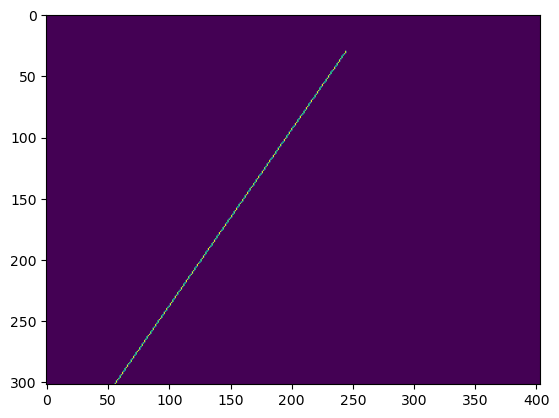

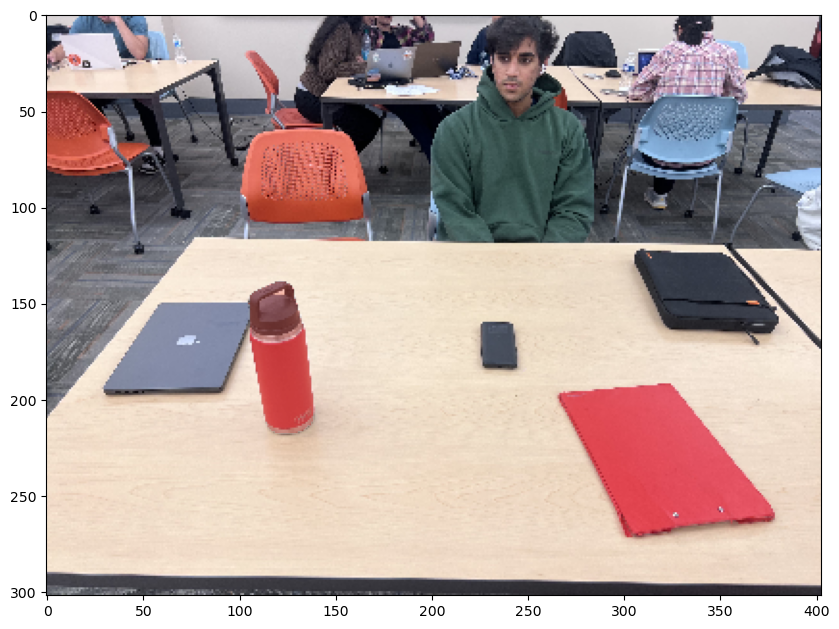

In [3]:



for file in os.listdir("./data"):
    if file.endswith(".jpeg") or file.endswith(".png"):
        if file != "IMG_7763.jpeg":
            continue
        image_path = os.path.join("./data", file)   
        img, small = img_module.load_img(image_path)
        img_module.set_img(small)
        
        # gaze estimation

        arrow_start, arrow_end = model2_module.find_vector_arrow(img)
        
        #segmentation
        masks = model_module.mask_generate(small)
        masks_on_table = mask_module.find_object_on_table(masks)
        if len(masks_on_table) == 0:
            print("No object on table")
            continue
        mask_line = img_module.get_mask_line(arrow_start, arrow_end)
        plt.imshow(mask_line)
        for mask in masks_on_table:
            seg = mask["segmentation"]
            if np.sum(seg & mask_line) > 0:
                img_module.show_anns([mask], True, file)
                # img_module.show_box(mask["bbox"])
                break
        
        
        

